In [1]:
import os

In [2]:
import random

In [3]:
import pandas as pd

In [4]:
from scipy.misc import imread

In [5]:
from scipy.misc import imresize

In [6]:
import numpy as np

In [7]:
import keras

C:\Users\Gurudeo\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from keras.models import Sequential


In [10]:
from keras.layers import Dense, Flatten, InputLayer

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
from keras.layers import Conv2D 

In [15]:
from keras.layers import MaxPooling2D

In [16]:
root_dir=os.path.abspath('.')

In [17]:
data_dir='C:/Users/Gurudeo/Desktop/Personal/Age Detection/'

In [18]:
data=pd.read_csv(os.path.join(data_dir, 'data.csv'))


In [19]:
msk = np.random.rand(len(data)) < 0.8

In [20]:
train = data[msk]
test = data[~msk]

In [21]:
images = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Data', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') 
    images.append(img)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [22]:
train_x=np.array(images)

In [23]:
images1=[]

In [24]:
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Data', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32')
    images1.append(img)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [25]:
test_x=np.array(images1)

In [26]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [27]:
lb = LabelEncoder()
test_y = lb.fit_transform(test.Class)
test_y = keras.utils.np_utils.to_categorical(test_y)

In [28]:
train_y=np.array(train_y)

In [29]:
test_y=np.array(test_y)

In [30]:
filters=50
filtersize=(5,5)
epochs =5
batchsize=128
input_shape=(32,32,3)

In [31]:
model3 = Sequential()
model3.add(keras.layers.InputLayer(input_shape=input_shape))

In [32]:
model3.add(keras.layers.convolutional.Conv2D(filters, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='sigmoid'))

In [33]:
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))#14

In [34]:
model3.add(keras.layers.convolutional.Conv2D(100, (5, 5), activation='sigmoid'))#10

In [35]:
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))#5

In [36]:
model3.add(Conv2D(100, (5, 5), activation='sigmoid'))#1

In [37]:
model3.add(Flatten())

In [38]:
model3.add(Dense(units=3,input_dim=100, activation='softmax'))

In [39]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 50)        3800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 100)       125100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 100)         250100    
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
__________

In [46]:
gmodel=model3.fit(train_x, train_y,validation_split=0.15, batch_size=64,epochs=40,verbose=1)

Train on 13492 samples, validate on 2382 samples
Epoch 1/40
13492/13492 [==============================] - 90s 7ms/step - loss: 0.9653 - acc: 0.5394 - val_loss: 0.8796 - val_acc: 0.5785
Epoch 2/40
13492/13492 [==============================] - 88s 7ms/step - loss: 0.8656 - acc: 0.5958 - val_loss: 0.8645 - val_acc: 0.5974
Epoch 3/40
13492/13492 [==============================] - 88s 7ms/step - loss: 0.8381 - acc: 0.6169 - val_loss: 0.8164 - val_acc: 0.6343
Epoch 4/40
13492/13492 [==============================] - 96s 7ms/step - loss: 0.8136 - acc: 0.6404 - val_loss: 0.7804 - val_acc: 0.6604
Epoch 5/40
13492/13492 [==============================] - 93s 7ms/step - loss: 0.7995 - acc: 0.6462 - val_loss: 0.7900 - val_acc: 0.6507
Epoch 6/40
13492/13492 [==============================] - 90s 7ms/step - loss: 0.7866 - acc: 0.6530 - val_loss: 0.7556 - val_acc: 0.6612
Epoch 7/40
13492/13492 [==============================] - 99s 7ms/step - loss: 0.7732 - acc: 0.6551 - val_loss: 0.7742 - val_acc:

In [47]:
predicted=model3.predict_classes(test_x)

In [52]:
pred = lb.inverse_transform(predicted)  


C:\Users\Gurudeo\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


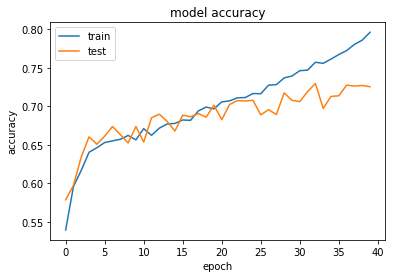

In [49]:
plt.plot(gmodel.history['acc'])
plt.plot(gmodel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

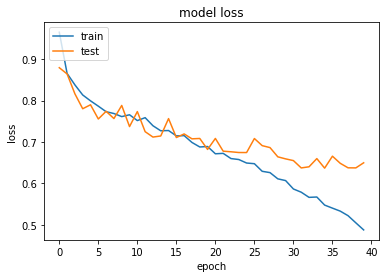

In [50]:
plt.plot(gmodel.history['loss'])
plt.plot(gmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
accuracy_score(test.Class,pred)

0.8068452380952381

In [54]:
from keras.models import model_from_json
model_json = model3.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
